# _10-amaliy topshiriq_

## 1.Kutubxonalarni import qilish

In [1]:
import numpy as np # chiziqli algebra
import pandas as pd # ma'lumotlarga ishlov berish, CSV faylini kiritish va chiqarish
import matplotlib.pyplot as plt # ma'lumotlarni vizualizatsiya qilish
import seaborn as sns # statistik ma'lumotlarni vizualiazatsiya qilish
%matplotlib inline


C:\Users\User\AppData\Local\Temp\ipykernel_17640\1378189815.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # ma'lumotlarga ishlov berish, CSV faylini kiritish va chiqarish


## 2. Ma'lumotlar to'plamini import qilish

In [8]:
data = 'data.csv'
df = pd.read_csv(data)

## 3. Tadqiqot ma'lumotlarini tahlil qilish

In [9]:
df.shape

(100, 5)

Ma'lumotlar to'plamida 100 ta namuna va 5 ta atribut mavjudligini ko'rishimiz mumkin. Ma'lumotlar
to'plami tavsifida ma'lumotlar to'plamida 100 namuna va 5 atribut mavjudligi berilgan. Shunday qilib,
birinchi instantsiya qator sarlavhasi va ma'lumotlar to'plamida 2 ta qo'shimcha atribut mavjud degan
xulosaga kelishimiz mumkin. Keyinchalik, bu haqda ko'proq ma'lumotga ega bo'lish uchun ma'lumotlar
to'plamini ko'rib chiqishimiz kerak.


#### Ma'lumotlar to'plamini ko'rish

In [11]:
df.head()

,Masofa,Haftalik_faollik,Haftalik_xarajat,Faollik,Manzil
0,2832,2,2565693,nofaol,uzoq
1,9945,3,791890,nofaol,uzoq
2,3364,6,7255933,faol,yaqin
3,4959,1,8392086,nofaol,uzoq
4,9325,2,5075020,nofaol,uzoq


## 4-qadam. Belgilar vektori va maqsadli o'zgaruvchini e'lon qilish

In [12]:
X = df
y = df['Faollik']

## 5-qadam. Kategorik o‘zgaruvchini butun songa aylantirish


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Faollik'] = le.fit_transform(X['Faollik'])
y = le.transform(y)

In [14]:
X.head()

,Masofa,Haftalik_faollik,Haftalik_xarajat,Faollik,Manzil
0,2832,2,2565693,1,uzoq
1,9945,3,791890,1,uzoq
2,3364,6,7255933,0,yaqin
3,4959,1,8392086,1,uzoq
4,9325,2,5075020,1,uzoq


In [15]:
X = df
y = df['Manzil']


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Manzil'] = le.fit_transform(X['Manzil'])
y = le.transform(y)

In [17]:
X.head()

,Masofa,Haftalik_faollik,Haftalik_xarajat,Faollik,Manzil
0,2832,2,2565693,1,0
1,9945,3,791890,1,0
2,3364,6,7255933,0,1
3,4959,1,8392086,1,0
4,9325,2,5075020,1,0


## 6-qadam. Belgilarni masshtablash

In [18]:
cols = X.columns

In [19]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [20]:
X.head()

,Masofa,Haftalik_faollik,Haftalik_xarajat,Faollik,Manzil
0,0.234609,0.333333,0.305728,1.0,0.0
1,0.994870,0.500000,0.094362,1.0,0.0
2,0.291471,1.000000,0.864616,0.0,1.0
3,0.461950,0.166667,1.000000,1.0,0.0
4,0.928602,0.333333,0.604739,1.0,0.0


## 7-qadam. Ikkita klasterli K-Means modeli


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=2, random_state=0)

## 8-qadam. K-Means model parametrlarini o'qitis

In [22]:
kmeans.cluster_centers_

array([[5.47387927e-01, 3.83534137e-01, 1.58213021e-01, 1.00000000e+00,
        5.55111512e-17],
       [2.45322285e-01, 8.92156863e-01, 3.03460665e-01, 0.00000000e+00,
        1.00000000e+00]])

In [23]:
kmeans.inertia_


27.021885866857883

## 9-qadam. Model bo'yicha zaif tasniflash sifatini tekshirish


In [24]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))
print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))

Natija: 100 ta namunadan 49 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.49


## 10-qadam. Klasterlarning optimal sonini topish uchun tirsak usulidan foydalanish

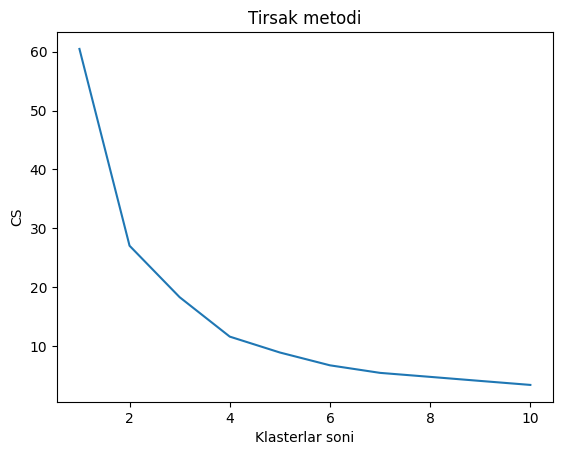

In [26]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Tirsak metodi')
plt.xlabel('Klasterlar soni')
plt.ylabel('CS')
plt.show()

## 11-qadam. Turli klasterlarga ega K-Means modeli

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
correct_labels = sum(y == labels)

print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))

print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))


Natija: 100 ta namunadan 100 tasi to‘g‘ri belgilangan.
Aniqlik bali: 1.00


In [29]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))

print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))


Natija: 100 ta namunadan 60 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.60


In [30]:
#oxirgi qadam. 
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# namunalarning qanchasi to'g'ri belgilanganligini tekshirish
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Natija: %d ta namunadan %d tasi to‘g‘ri belgilangan." % (y.size,correct_labels))

print('Aniqlik bali: {0:0.2f}'. format(correct_labels/float(y.size)))


Natija: 100 ta namunadan 49 tasi to‘g‘ri belgilangan.
Aniqlik bali: 0.49


Biz nisbatan yuqori aniqlikka erishdik 100% k=2. Natija va xulosa
1. Ushbu loyihada K-Means Clustering deb nomlangan eng mashhur nazoratsiz klasterlash texnikasini
amalga oshirdik.
2. Tirsak usulini qo'lladik va k=2 (k - klasterlar soni) ushbu ma'lumotlarni klasterlash uchun yaxshi
klaster soni deb hisoblanishi mumkinligini aniqladik.
3. Men modelning 27.021885866857883 ga teng juda yuqori inersiyaga ega ekanligini aniqladik. Shunday qilib, bu
ma'lumotlarga mos keladigan yaxshi model emas.
4. Bizning nazoratsiz modelimiz tomonidan k=4 bilan 49% tasniflash aniqligiga erishdik.
5. Shunday qilib, k qiymatini o'zgartirdik va nisbatan yuqoriroq tasniflash aniqligini topdik 62% k=4.
6. Demak, k=2 klasterlarning optimal soni degan xulosaga kelishimiz mumkin.
